<a href="https://colab.research.google.com/github/PolyanskayaP/FMMRAZ_6sem/blob/main/Lab1_fmmraz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.	Для формирования исходных данных сгенерировать случайным образом в пространстве критериев     точек, равномерно распределенных на множестве достижимых векторных оценок, заданном системой ограничений-неравенств 

n=23

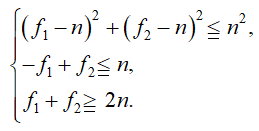

In [ ]:
from numpy.lib.nanfunctions import nancumsum
from random import uniform
import numpy as np

n=23
NACH=11.5
KON=46
KOLVO=20

def get_odz(f1):
    f2=[]
    yverh, yniz = 0, 0
    f1sq = 11.5*np.sqrt(2) + 23
    if (f1 >= 11.5) and (f1 <= 23):
        yverh=23+f1
        yniz=46-f1
    elif (f1 > 23) and (f1 <= f1sq):
        yverh=np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz=46-f1
    elif (f1 > f1sq) and (f1 <= 46):
        yverh=np.sqrt((23**2 - (f1-23)**2)) + 23
        yniz= - np.sqrt((23**2 - (f1-23)**2)) + 23
    f2.append(yniz)
    f2.append(yverh)
    return(f2)

def gener_f1_f2(nach, kon, kolvo):
    f1_ar = np.random.uniform(nach, kon, kolvo)  #сгенерировали массив иксов
    f2_ar = []
    for f1 in f1_ar:
        na, ko = get_odz(f1)
        f2 = uniform(na, ko)
        f2_ar.append(f2) 
    #dictionary = dict(zip(f1_ar, f2_ar))
    return(f1_ar, f2_ar)

F1, F2 = gener_f1_f2(NACH, KON, KOLVO)
print(F1)
print(F2)

[32.14256701 42.8672174  31.11454113 12.93628166 20.75916233 26.50972085
 44.57300262 43.74020395 40.13551987 12.09614001 12.16531354 36.28237643
 21.08181523 19.55787816 27.3494725  42.44285901 14.56153121 41.23494491
 36.75015612 18.03315651]
[42.016487894346234, 18.921495823271616, 29.4731509433302, 33.08435018740535, 43.37545513708366, 32.84748176663973, 24.778677626769614, 29.591921564451184, 18.88092391664543, 34.44600609495202, 34.67733346177157, 26.504468028916158, 43.998036973179865, 35.2792158757661, 45.16516834263031, 14.603801419703698, 37.21601017680524, 34.381547526290746, 14.260278135365624, 34.304924372546]


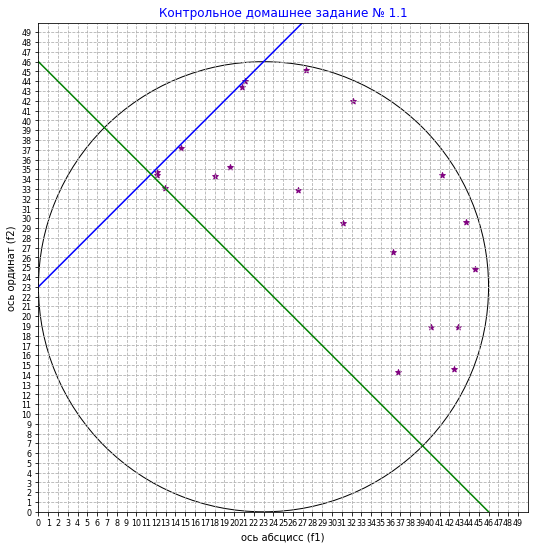

<Figure size 360x144 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((15,9)))
ax = fig.add_subplot(111) 

f1a = np.linspace(0, 50, 100)
f2a = n + f1a

f1b = np.linspace(0, 50, 100)
f2b = 2*n - f1b 

ax.scatter(F1, F2, color = 'purple', marker = '*')  #точки

cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

ax.add_artist( cc ) 

plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')  #стиль сеточки 

plt.xticks([i for i in range(50)], size=8)
plt.yticks([i for i in range(50)], size=8)

K = plt.figure() 
K.set_figwidth(5) 
K.set_figheight(2) 

ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
ax.set_title('Контрольное домашнее задание № 1.1', color = 'blue', size = 12)
ax.set_xlabel('ось абcцисc (f1)')
ax.set_ylabel('ось ординат (f2)')

ax.plot(f1a, f2a, color = 'blue')
ax.plot(f1b, f2b, color = 'green')

plt.show()

2.	Определить множество эффективных проектов с помощью алгоритма исключения заведомо неэффективных решений.

In [ ]:
def pareto_mu(f1, f2, t1, t2):
    if (f1 == t1) and (f2 == t2):
        return 1
    elif (t1 <= f1) and (t2 <= f2):
        return -1
    else:
        return 0

def find_pareto(f1_ar, f2_ar, kolvo):
    tabl = []
    for f1, f2 in zip(f1_ar, f2_ar):
        inc = 0
        el = [0 for i in range(kolvo)]
        tabl.append(el)
        for t1, t2 in zip(f1_ar, f2_ar):
            if (len(tabl)==1):
                tabl[len(tabl)-1][inc] = pareto_mu(f1, f2, t1, t2) 
            elif (tabl[-2][inc] != -1):
                tabl[len(tabl)-1][inc] = pareto_mu(f1, f2, t1, t2) 
            elif (tabl[-2][inc] == -1):
                tabl[len(tabl)-1][inc] = -1
            inc = inc + 1
    Tabl = np.array(tabl)
    inc = 0
    pare1 = []
    pare2 = []
    not_pare1 = []
    not_pare2 = []
    for q in Tabl[-1]:
        if (q==-1):
            not_pare1.append(f1_ar[inc])
            not_pare2.append(f2_ar[inc])
        else:
            pare1.append(f1_ar[inc])
            pare2.append(f2_ar[inc])
        inc = inc + 1
    return(pare1, pare2, not_pare1, not_pare2)
        

PARE1, PARE2, NOT_PARE1, NOT_PARE2 = find_pareto(F1, F2, KOLVO)

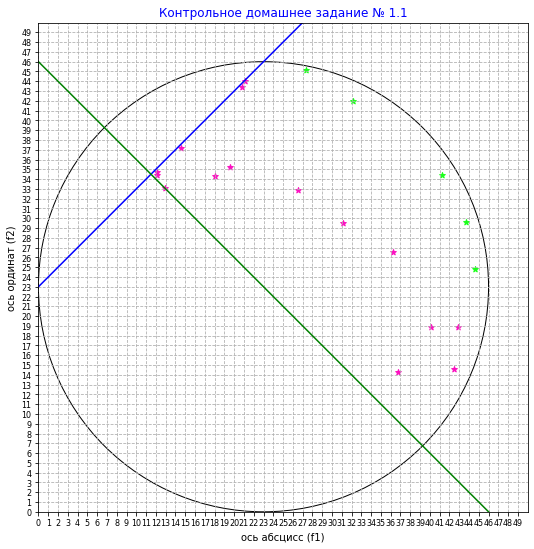

<Figure size 360x144 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((15,9)))
ax = fig.add_subplot(111) 

f1a = np.linspace(0, 50, 100)
f2a = n + f1a

f1b = np.linspace(0, 50, 100)
f2b = 2*n - f1b 

ax.scatter(PARE1, PARE2, color = '#19ff19', marker = '*')  #точки
ax.scatter(NOT_PARE1, NOT_PARE2, color = '#FC0FC0', marker = '*')  #точки

cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

ax.add_artist( cc ) 

plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')  #стиль сеточки 

plt.xticks([i for i in range(50)], size=8)
plt.yticks([i for i in range(50)], size=8)

K = plt.figure() 
K.set_figwidth(5) 
K.set_figheight(2) 

ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
ax.set_title('Контрольное домашнее задание № 1.1', color = 'blue', size = 12)
ax.set_xlabel('ось абcцисc (f1)')
ax.set_ylabel('ось ординат (f2)')

ax.plot(f1a, f2a, color = 'blue')
ax.plot(f1b, f2b, color = 'green')

plt.show()

3.	Выполнить кластеризацию множества проектов с помощью алгоритма многокритериального ранжирования данных на основе вычисления индекса эффективности. В качестве центров кластеров использовать значения индекса эффективности: K1=1  K2=0.85 K3=0.75

In [26]:
def cluster_pareto_mu(f1, f2, t1, t2):
    if (f1 == t1) and (f2 == t2):
        return 0
    elif (t1 >= f1) and (t2 >= f2):
        return 1
    else:
        return 0

def cluster_find_pareto(f1_ar, f2_ar, kolvo):  #f1 f2
    import pandas as pd
    kl1 = [[], []]
    kl8 = [[], []]
    kl7 = [[], []]
    kl6 = [[], []]
    inc = 0
    bi = [0 for i in range(kolvo)]  #bi
    F = [0 for i in range(kolvo)]
    kakie = [[] for i in range(kolvo)]  #bi kakie
    K = [0 for i in range(kolvo)]
    for f1, f2 in zip(f1_ar, f2_ar):
        inc2=0
        for t1, t2 in zip(f1_ar, f2_ar):
            cpm = cluster_pareto_mu(f1,f2,t1,t2)
            bi[inc]=bi[inc]+ cpm 
            if cpm==1:
                kakie[inc].append(inc2)
            inc2 = inc2 + 1
        F[inc] = 1 / (1+(bi[inc]/(kolvo-1)))
        if F[inc] == 1:    #изменить?
            K[inc] = 1
            kl1[0].append(f1_ar[inc]) 
            kl1[1].append(f2_ar[inc])
        elif (F[inc]<1) and (F[inc]>=0.85):
            K[inc] = 0.85
            kl8[0].append(f1_ar[inc]) 
            kl8[1].append(f2_ar[inc])
        elif (F[inc]<0.85) and (F[inc]>=0.7):
            K[inc] = 0.75 
            kl7[0].append(f1_ar[inc]) 
            kl7[1].append(f2_ar[inc])
        else:
            K[inc] = 0.6  
            kl6[0].append(f1_ar[inc]) 
            kl6[1].append(f2_ar[inc])
        inc = inc + 1
    tabl = {'f1': f1_ar, 
            'f2': f2_ar, 
            'bi': bi, 
            'bi точки': kakie, 
            'Фi':F, 
            'Ki': K}
    Tabl = pd.DataFrame(tabl)
    #print(Tabl.to_string())

    #print(Tabl)
    return kl1, kl8, kl7, kl6, Tabl
    

cluster_find_pareto(F1, F2, KOLVO)

([[32.14256700897742,
   44.57300261757458,
   43.74020394783268,
   27.349472502357045,
   41.234944914219895],
  [42.016487894346234,
   24.778677626769614,
   29.591921564451184,
   45.16516834263031,
   34.381547526290746]],
 [[42.867217395756384,
   31.114541131855894,
   20.75916232979766,
   26.50972085109811,
   36.282376429523275,
   21.081815228797133,
   42.442859009440156],
  [18.921495823271616,
   29.4731509433302,
   43.37545513708366,
   32.84748176663973,
   26.504468028916158,
   43.998036973179865,
   14.603801419703698]],
 [[12.936281656611852,
   40.13551987323235,
   12.096140008265442,
   12.165313543080282,
   19.557878162559618,
   14.561531208074381,
   36.75015612410333,
   18.033156510911574],
  [33.08435018740535,
   18.88092391664543,
   34.44600609495202,
   34.67733346177157,
   35.2792158757661,
   37.21601017680524,
   14.260278135365624,
   34.304924372546]],
 [[], []],
            f1         f2  bi                        bi точки        Фi    Ki
 0  

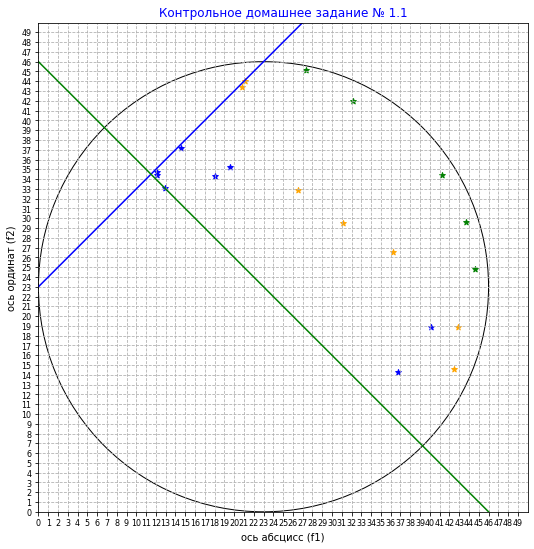

<Figure size 360x144 with 0 Axes>

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=((15,9)))
ax = fig.add_subplot(111) 

f1a = np.linspace(0, 50, 100)
f2a = n + f1a

f1b = np.linspace(0, 50, 100)
f2b = 2*n - f1b 

KL1, KL8, KL7, KL6, TABL = cluster_find_pareto(F1, F2, KOLVO)

ax.scatter(KL1[0], KL1[1], color = 'green', marker = '*')  #точки
ax.scatter(KL8[0], KL8[1], color = 'orange', marker = '*')  #точки
ax.scatter(KL7[0], KL7[1], color = 'blue', marker = '*')  #точки
ax.scatter(KL6[0], KL6[1], color = 'red', marker = '*')  #точки

cc = plt.Circle(( 23 , 23 ), 23, color='k', fill=False ) 
ax.set_aspect(1)  #чтобы ровненько было, не вытянуто 

ax.add_artist( cc ) 

plt.xlim(-1.25,1.25)  #координатная сетка от скольки до скольки 
plt.ylim(-1.25,1.25)

plt.grid(linestyle='--')  #стиль сеточки 

plt.xticks([i for i in range(50)], size=8)
plt.yticks([i for i in range(50)], size=8)

K = plt.figure() 
K.set_figwidth(5) 
K.set_figheight(2) 

ax.set_xlim([0, 50])
ax.set_ylim([0, 50])
ax.set_title('Контрольное домашнее задание № 1.1', color = 'blue', size = 12)
ax.set_xlabel('ось абcцисc (f1)')
ax.set_ylabel('ось ординат (f2)')

ax.plot(f1a, f2a, color = 'blue')
ax.plot(f1b, f2b, color = 'green')

plt.show()